In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras import datasets, layers, models

In [44]:

# Datasetimizi (cifar10 verisetini) yüklüyoruz.
# Yükleme işlemi için Internet bağlantınızın olması gerekiyor. 
# Eğer bağlantınız yoksa  veri setini Internetten indirip de yükleyebilirsiniz..

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Yukarıdaki kodda, cifar10.load_data() fonksiyonu iki tuple döner:


# İlk tuple: (x_train, y_train) (Eğitim verisi ve etiketleri)

# İkinci tuple: (x_test, y_test) (Test verisi ve etiketleri)

In [46]:
x_train.shape

(50000, 32, 32, 3)

In [48]:
# Her görüntü 32x32 piksel kare boyutunda, 3 renkli kanal rgb bilgilerine ulaşıyoruz..

In [50]:
x_test.shape

(10000, 32, 32, 3)

In [52]:
y_train.shape

(50000, 1)

In [54]:
y_test.shape

(10000, 1)

In [56]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [58]:
# CIFAR-10 veri setinde etiketler (y_train ve y_test) aslında iki boyutlu bir dizide bulunur, 
# çünkü her bir etiket [class_id] formatında küçük bir liste içinde saklanır 
# (örneğin: [[3], [5], [7]]). Ancak bu, veriyi görsel olarak işlememizi ve kullanmamızı zorlaştırabilir.

# y_test = [[3], [1], [9], ..., [0]]  # (10000, 1)
# Bu veri yapısı, birçok makine öğrenimi veya grafiksel analiz aracı için gereksiz karmaşıklık yaratabilir. 
# Yalnızca sınıf etiketlerine (örneğin: 3, 1, 9) ihtiyacımız varken ikinci boyutun varlığı anlamlı olmaz. 
# İşte bu yüzden, tek boyutlu hale getirilmeli..

y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [67]:
image_class = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [75]:
# veri setindeki görsellere bakalım..

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])        
    plt.xlabel(image_class[y[index]])
    plt.show()
    

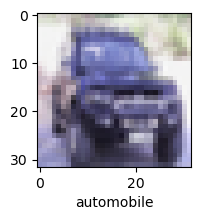

In [89]:
plot_sample(x_test, y_test, 9)

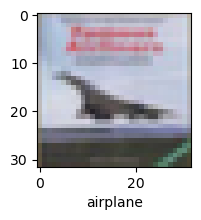

In [91]:
plot_sample(x_test, y_test, 3)

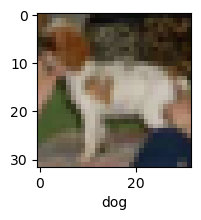

In [93]:
plot_sample(x_test, y_test, 12)

In [95]:

# ve tabiki normalizasyon...

# Verilerimizi normalize etmemiz gerekiyor. 
# Aksi takdirde CNN algoritmaları yanlış sonuç verebiliyor. 

# Fotoğraflar RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için 
# normalization için basitçe her bir pixel değerini 255'e bölmemiz yeterli..

x_train = x_train / 255
x_test = x_test / 255

In [97]:


model = models.Sequential([
    # İlk bölüm Convolution layer.. Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz...
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    # İkinci bölüm klasik Articial Neural Network olan layerımız.. Yukarıdaki özelliklerimiz ve training bilgilerine
    # göre ANN modelimizi eğiteceğiz..
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [101]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3842 - loss: 1.6946
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6024 - loss: 1.1354
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6636 - loss: 0.9704
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6965 - loss: 0.8704
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7190 - loss: 0.8024


In [103]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6950 - loss: 0.8933


[0.9096587896347046, 0.6888999938964844]

In [107]:
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [109]:
pred[0]

array([2.4114983e-04, 5.0035807e-05, 6.7323158e-03, 8.9429051e-01,
       1.5974593e-04, 8.7318301e-02, 3.5865179e-03, 3.0295522e-04,
       6.9844197e-03, 3.3400528e-04], dtype=float32)

In [117]:
# tahmin sınıfları

pred_class =[np.argmax(i) for i in pred] 


pred_class[:4]

[3, 1, 1, 0]

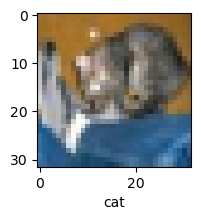

In [121]:
plot_sample(x_test,y_test,0)

In [119]:
image_class[pred_class[0]]

'cat'

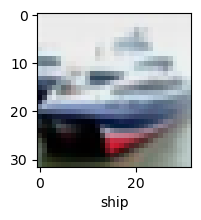

In [129]:
plot_sample(x_test, y_test,1)

In [131]:
image_class[pred_class[1]]

'automobile'

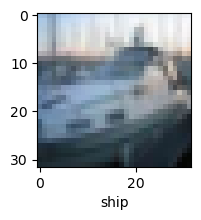

In [133]:
plot_sample(x_test, y_test,2)

In [135]:
image_class[pred_class[2]]

'automobile'